## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [439]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import qgrid

ModuleNotFoundError: No module named 'qgrid'

In [218]:
customer_data=pd.read_csv('Online Retail.csv',encoding= 'unicode_escape')
customer_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [219]:
customer_data.shape

(541909, 8)

In [220]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [221]:
customer_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [222]:
customer_data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Data Cleaning

In [223]:
pd.DataFrame(customer_data.isna().mean())

,0
InvoiceNo,0.000000
StockCode,0.000000
Description,0.002683
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
CustomerID,0.249267
Country,0.000000


### 25 % of items purchase are not assigned to  Customers
- Hence there is no use of having the data with out customer assignment
- So its better to Delete them from data frame

In [224]:
customer_data.dropna(subset=['CustomerID'],inplace=True)


In [225]:
customer_data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

- There are no null values in the dataset

## Exploring Countries contribution to statistics in data

In [226]:
country_grouped_data=customer_data.groupby(["InvoiceNo","Country"]).count().reset_index().\
groupby("Country").count()["InvoiceNo"].reset_index().\
rename(columns={"InvoiceNo":"Count"}).sort_values("Count",ascending=False)\
.reset_index().drop('index',axis=1)
country_grouped_data

,Country,Count
0,United Kingdom,19857
1,Germany,603
2,France,458
3,EIRE,319
4,Belgium,119
5,Spain,105
6,Netherlands,101
7,Switzerland,71
8,Portugal,70
9,Australia,69


## total there are 36 countries making purchases

<AxesSubplot:xlabel='Country', ylabel='Count'>

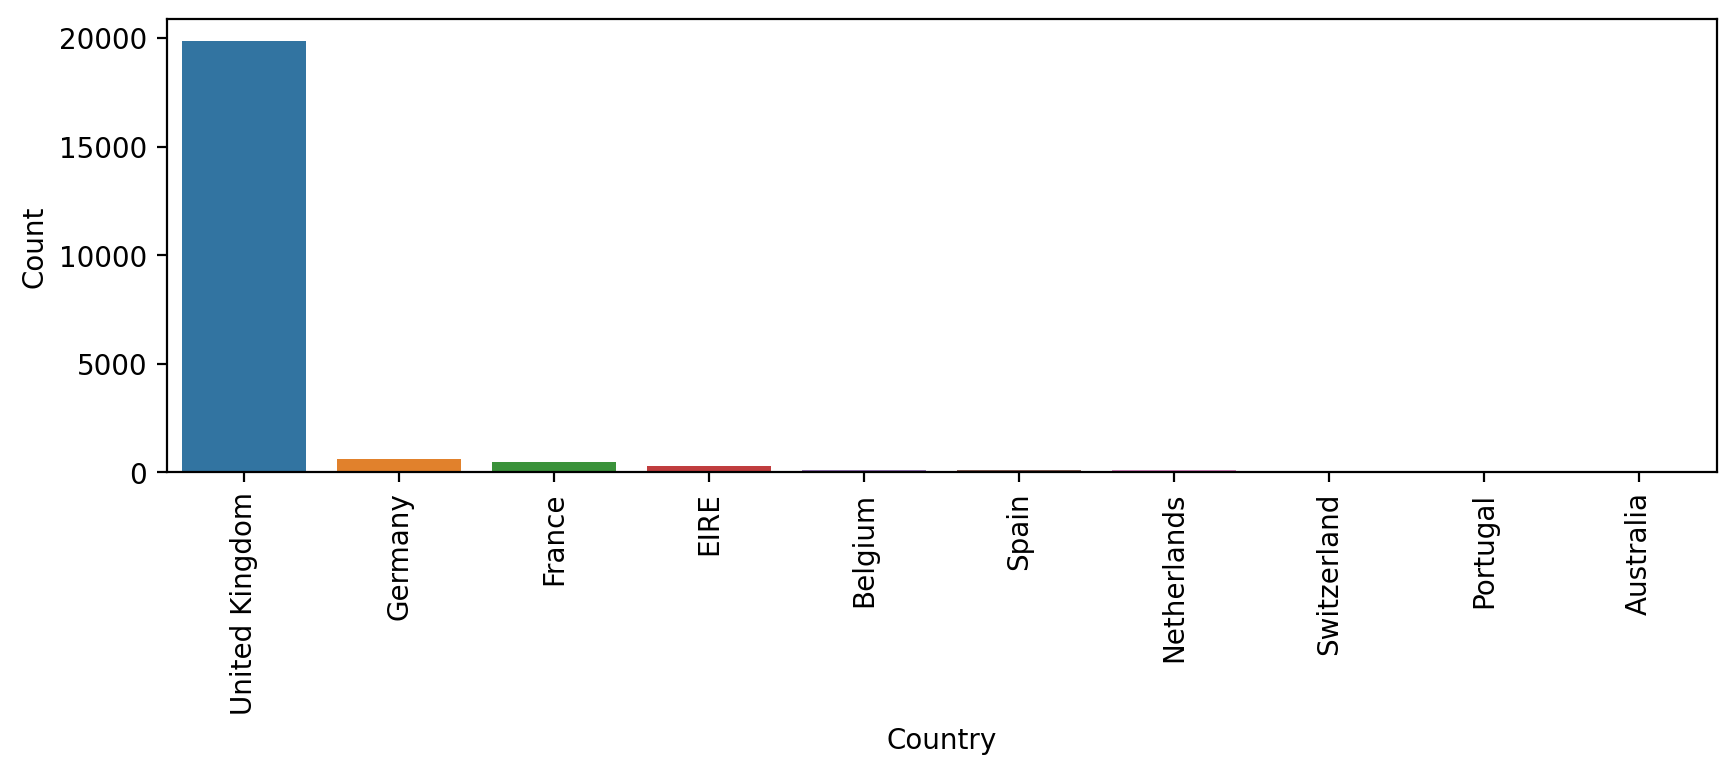

In [227]:
plt.figure(figsize=(10,3),dpi=200)
plt.xticks(rotation=90)
sns.barplot(data=country_grouped_data.head(10),x="Country",y="Count")

- United Kingdom is making most of the purchases compared to other countries

# Removing items from uncanceled list that came back for cancellation

In [426]:
cancelled_items=pd.DataFrame()
cancelled_items_=customer_data[customer_data["Quantity"]< -0].sort_values("Quantity")
def find_similar_data(cancel_item):
    # return(cancel_item)
    cancel_item=customer_data.loc[cancel_item]
    # print(cancel_item,"HEY")

    # cancel_item=cancelled_items_

    item_name=cancel_item.Description
    item_stockcode=cancel_item.StockCode
    item_quantity=-1 * cancel_item.Quantity
    item_customer_id=cancel_item.CustomerID
    condition_1=customer_data['StockCode']==item_stockcode
    condition_2=customer_data['Quantity']==item_quantity
    condition_3=customer_data['Description']==item_name
    condition_4=customer_data['CustomerID']==item_customer_id
    df=customer_data[condition_1 & condition_2 & condition_3 & condition_4]
#     display(df.head(1))
    try:
        cancelled_items[df.index[0]]=df.iloc[0,:]
    except:
        None

cancelled_items_.reset_index().rename(columns={'index':"cancelled_index"})["cancelled_index"].apply(lambda x:find_similar_data(x))
cancelled_items.T

C:\Users\Melon\AppData\Local\Temp/ipykernel_768/3813632590.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  cancelled_items[df.index[0]]=df.iloc[0,:]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Cost
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,11-01-2011 12:55,2.1,15749.0,United Kingdom,6539.4
52710,540815,21175,GIN + TONIC DIET METAL SIGN,2000,11-01-2011 12:55,1.85,15749.0,United Kingdom,3700.0
52709,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,11-01-2011 12:55,2.55,15749.0,United Kingdom,4921.5
223446,556484,22920,HERB MARKER BASIL,1515,12-06-2011 13:17,0.55,16938.0,United Kingdom,833.25
383960,570094,20971,PINK BLUE FELT CRAFT TRINKET BOX,1296,07-10-2011 11:56,1.06,16029.0,United Kingdom,1373.76
...,...,...,...,...,...,...,...,...,...
308629,564042,22691,DOORMAT WELCOME SUNRISE,1,22-08-2011 12:52,7.95,15443.0,United Kingdom,7.95
177541,552108,22424,ENAMEL BREAD BIN CREAM,1,06-05-2011 11:36,12.75,17841.0,United Kingdom,12.75
215614,555726,22423,REGENCY CAKESTAND 3 TIER,1,06-06-2011 16:23,12.75,12540.0,Spain,12.75
205858,554839,22550,HOLIDAY FUN LUDO,1,26-05-2011 17:15,3.75,14056.0,United Kingdom,3.75


In [437]:
cancelled_customer_data=cancelled_items.T
display(cancelled_customer_data)
print("Shape Before removing cancelled items",customer_data.shape)
customer_data.drop(index=cancelled_items_.index,axis=0,inplace=True)
print("Shape After removing cancelled items",customer_data.shape)
customer_data.drop(index=cancelled_customer_data.index,axis=0,inplace=True)
print("Shape After removing uncancelled items from list that came back as cancelled",customer_data.shape)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Cost
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,11-01-2011 12:55,2.1,15749.0,United Kingdom,6539.4
52710,540815,21175,GIN + TONIC DIET METAL SIGN,2000,11-01-2011 12:55,1.85,15749.0,United Kingdom,3700.0
52709,540815,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1930,11-01-2011 12:55,2.55,15749.0,United Kingdom,4921.5
223446,556484,22920,HERB MARKER BASIL,1515,12-06-2011 13:17,0.55,16938.0,United Kingdom,833.25
383960,570094,20971,PINK BLUE FELT CRAFT TRINKET BOX,1296,07-10-2011 11:56,1.06,16029.0,United Kingdom,1373.76
...,...,...,...,...,...,...,...,...,...
308629,564042,22691,DOORMAT WELCOME SUNRISE,1,22-08-2011 12:52,7.95,15443.0,United Kingdom,7.95
177541,552108,22424,ENAMEL BREAD BIN CREAM,1,06-05-2011 11:36,12.75,17841.0,United Kingdom,12.75
215614,555726,22423,REGENCY CAKESTAND 3 TIER,1,06-06-2011 16:23,12.75,12540.0,Spain,12.75
205858,554839,22550,HOLIDAY FUN LUDO,1,26-05-2011 17:15,3.75,14056.0,United Kingdom,3.75


Shape Before removing cancelled items (406823, 9)
Shape After removing cancelled items (397921, 9)
Shape After removing uncancelled items from list that came back as cancelled (394866, 9)


- PAPER CRAFT , LITTLE BIRDIE item is purchased in huge quantity and canceled immediately 
- This event is happened by accident because it costs a lot of money to purchase that much of quantity

<AxesSubplot:xlabel='Country'>

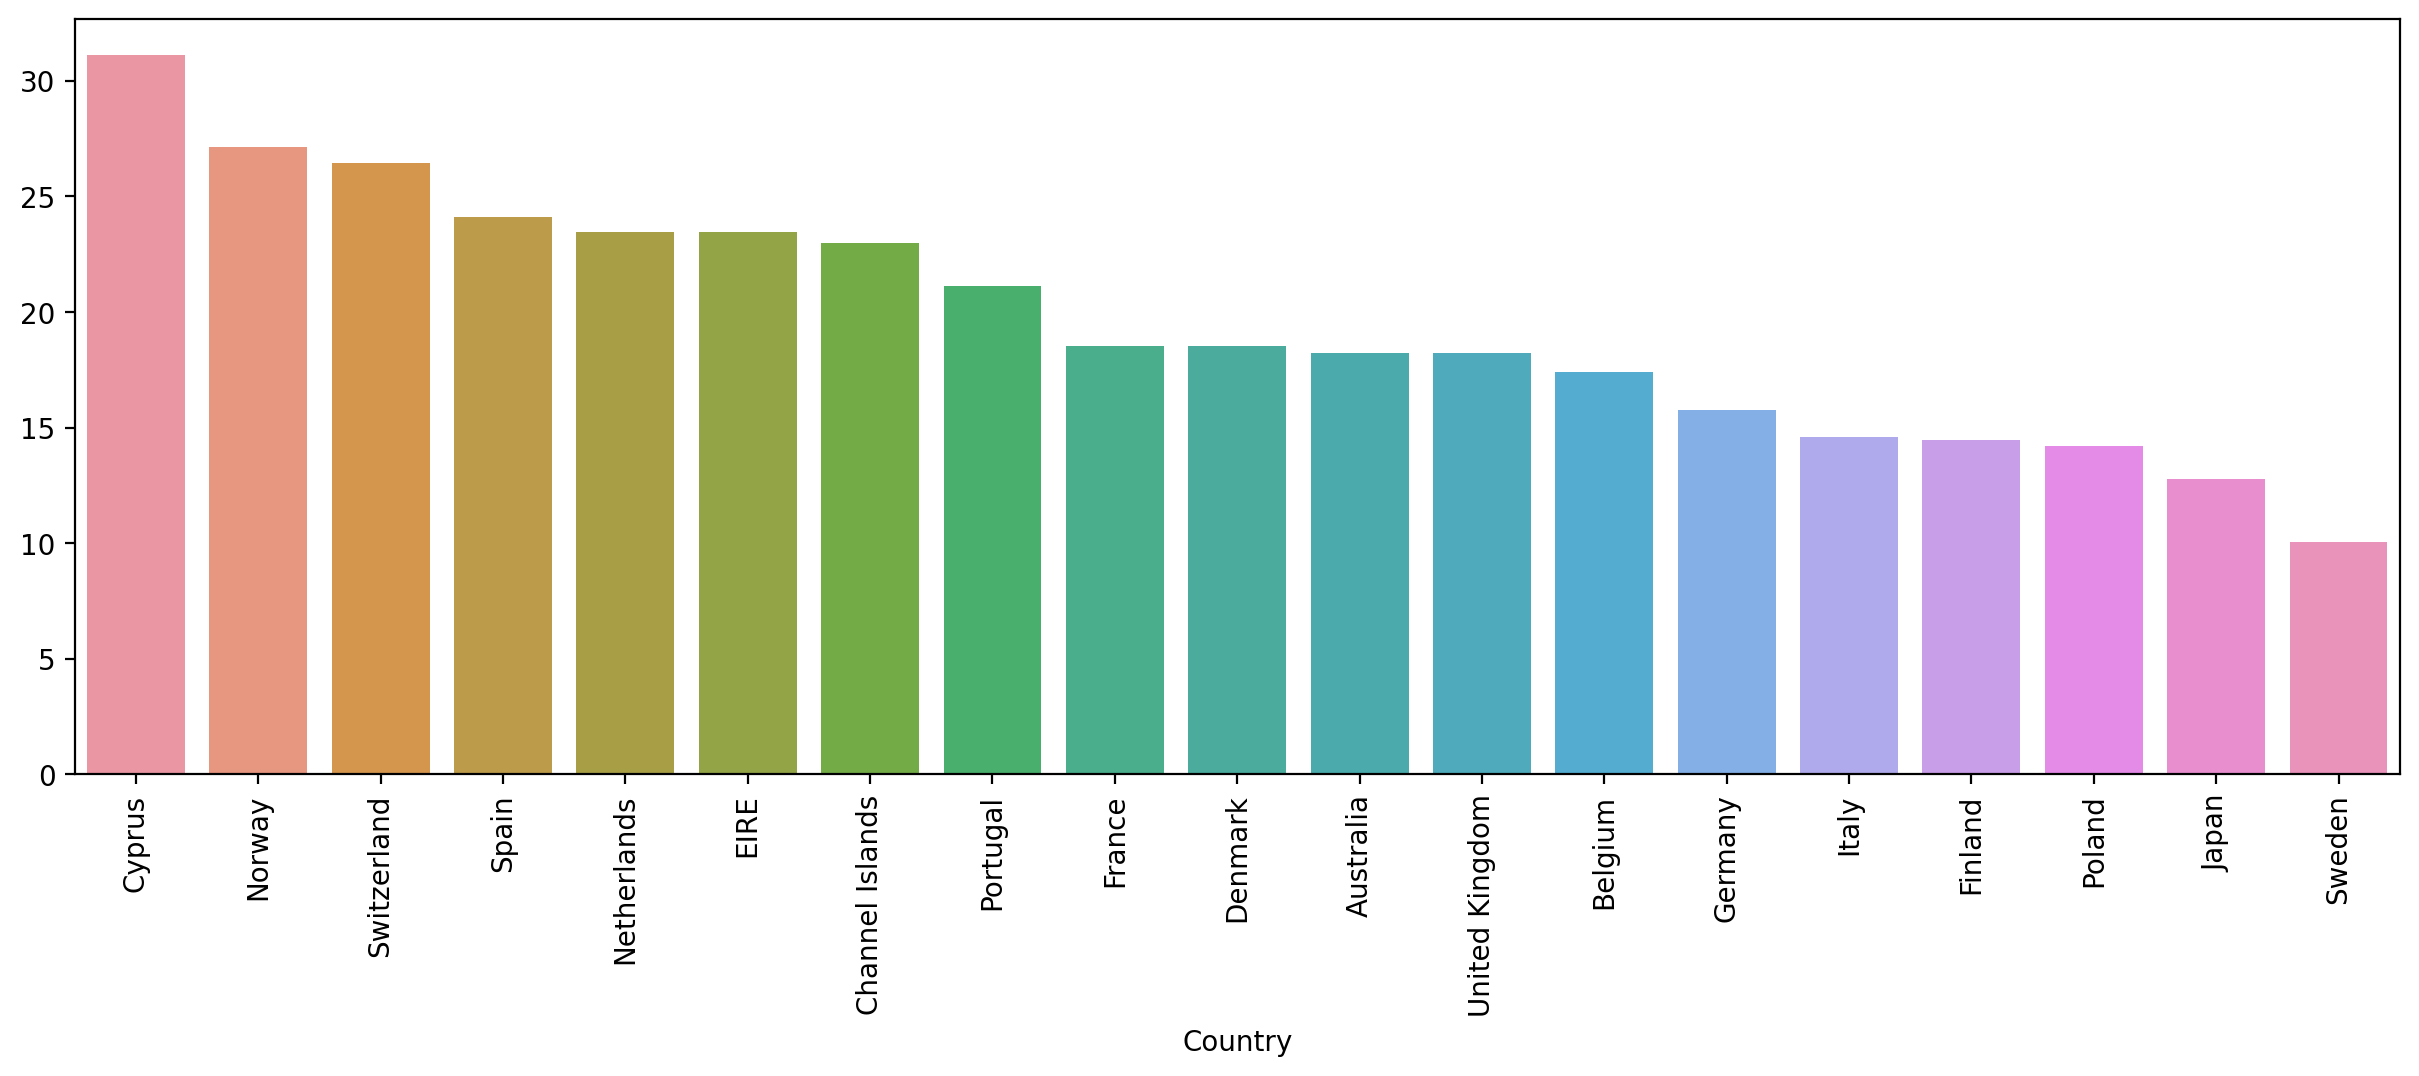

In [251]:
average_items_purchase_country_wise=customer_data.groupby(["InvoiceNo","Country"]).count().groupby("Country").mean()["Quantity"]
country_with20_min_invoices=country_grouped_data[country_grouped_data["Count"]>19].Country.values
average_items_purchase_country_wise=\
    average_items_purchase_country_wise\
    [average_items_purchase_country_wise.index.isin(country_with20_min_invoices)].sort_values(ascending=False)

plt.figure(figsize=(15,5),dpi=200)
plt.xticks(rotation=90)
sns.barplot(y=average_items_purchase_country_wise.values,x=average_items_purchase_country_wise.index)

- Above is the bar graph of the average items purchased from countries that are having more than 20 transaction (more than 20 invoices)

In [281]:
uncancelled_items=customer_data[~ customer_data["InvoiceNo"].str.contains("C|c")]
top_sold_out_items=customer_data.groupby("Description").sum()["Quantity"].reset_index()\
.groupby("Description").sum().sort_values(by="Quantity",ascending=False).reset_index()
# top_sold_out_items
customer_data.groupby(["Description","CustomerID"]).count().reset_index().groupby("Description")["CustomerID"]\
.count().sort_values(ascending=False)
# top_sold_out_items.head(30)

Description
REGENCY CAKESTAND 3 TIER               887
WHITE HANGING HEART T-LIGHT HOLDER     858
PARTY BUNTING                          708
ASSORTED COLOUR BIRD ORNAMENT          679
SET OF 3 CAKE TINS PANTRY DESIGN       640
                                      ... 
PURPLE CHUNKY GLASS+BEAD NECKLACE        1
WHITE ANEMONE ARTIFICIAL FLOWER          1
STORAGE TIN VINTAGE DOILEY               1
LILAC FEATHERS CURTAIN                   1
PINK MARSHMALLOW SCARF KNITTING KIT      1
Name: CustomerID, Length: 3895, dtype: int64

<AxesSubplot:xlabel='Quantity', ylabel='Description'>

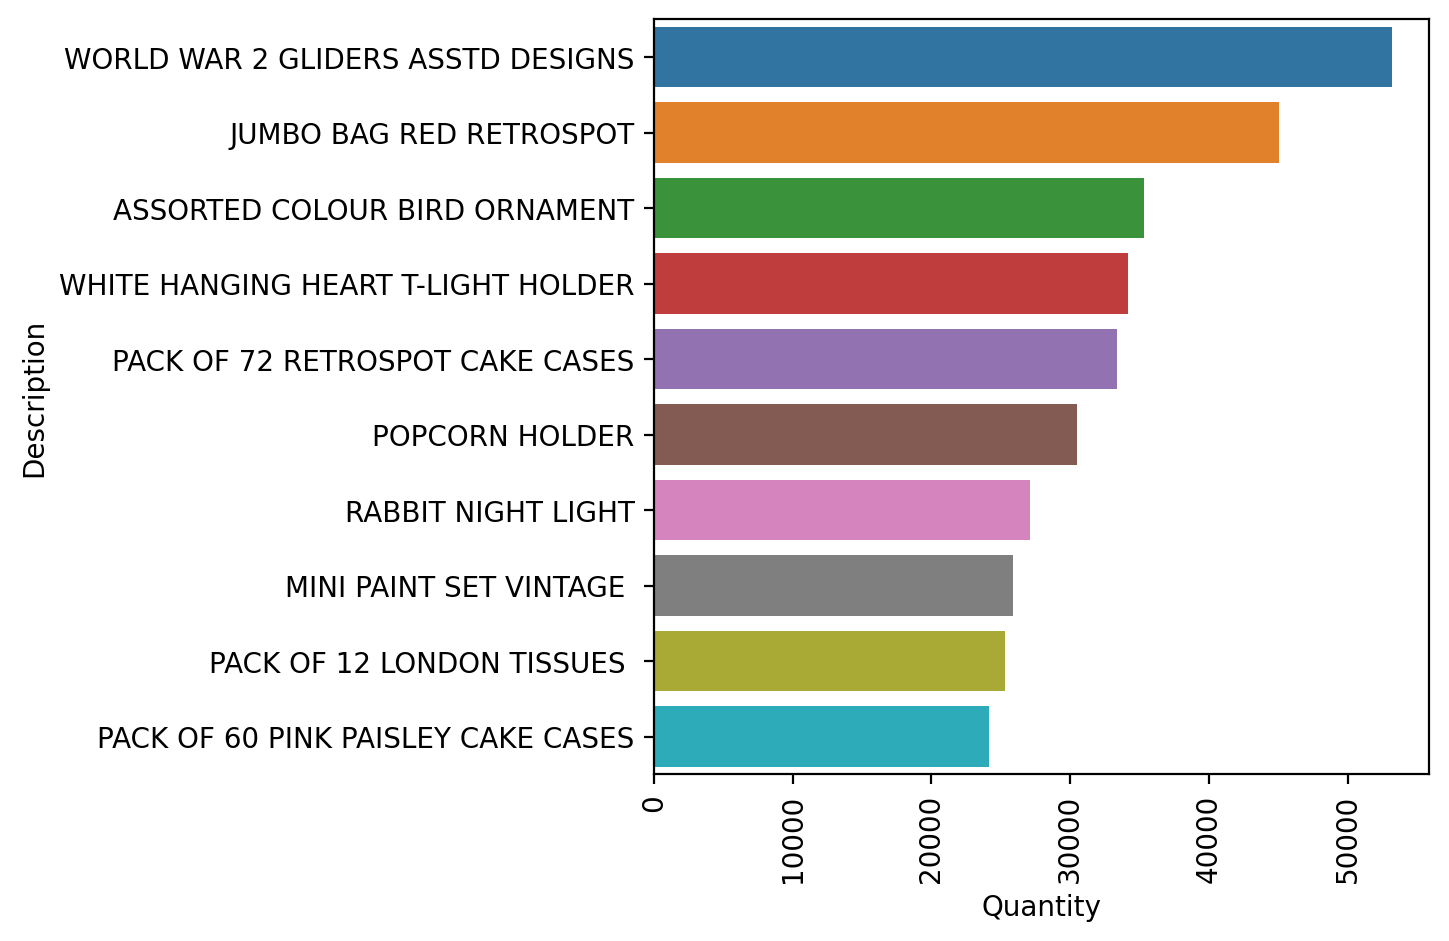

In [265]:
plt.figure(figsize=(5,5),dpi=200)
plt.xticks(rotation=90)
sns.barplot(data=top_sold_out_items.head(10),x="Quantity",y="Description")

- Top 10 items purchased quantity wise

In [254]:
customer_data["Total_Cost"]=customer_data["Quantity"]*customer_data["UnitPrice"]


In [263]:
a=customer_data.groupby("Description")["Total_Cost"].sum().sort_values(ascending=False).tail(15).index

In [150]:
uncancelled_items=customer_data[~ customer_data["InvoiceNo"].str.contains("C|c")]
customer_data[customer_data["Description"]=='ROTATING SILVER ANGELS T-LIGHT HLDR'].sort_values("Quantity")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Cost
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,02-12-2010 14:23,0.03,15838.0,United Kingdom,-280.80
44303,C540164,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-6,05-01-2011 12:02,2.55,14911.0,EIRE,-15.30
414618,C572473,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-1,24-10-2011 13:34,2.55,18188.0,United Kingdom,-2.55
412073,572278,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,1,23-10-2011 10:46,2.55,16326.0,United Kingdom,2.55
361546,568346,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,1,26-09-2011 15:28,4.96,14096.0,United Kingdom,4.96
...,...,...,...,...,...,...,...,...,...
4479,536784,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,240,02-12-2010 15:20,1.88,15061.0,United Kingdom,451.20
23254,538191,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,240,10-12-2010 10:49,1.88,15061.0,United Kingdom,451.20
31595,538998,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,480,15-12-2010 12:08,1.88,15061.0,United Kingdom,902.40
413848,572325,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,600,24-10-2011 09:54,1.74,14607.0,United Kingdom,1044.00


In [253]:
top_10_revenue_from_items=customer_data.groupby("Description").sum()
# sns.barplot(top_10_revenue_from_items.head(10),x='Total_Cost',y="")
top_10_revenue_from_items['Customer_Count']=customer_data.groupby("Description").count()["Quantity"]
top_10_revenue_from_items['Average']=customer_data.groupby("Description").mean()["Total_Cost"]

top_10_revenue_from_items

KeyError: 'Total_Cost'

In [192]:
top_10_revenue_from_items.sort_values("Total_Cost",ascending=False)

,Quantity,UnitPrice,CustomerID,Total_Cost,Customer_Count,Average
Description,,,,,,
REGENCY CAKESTAND 3 TIER,11555,23678.05,28473438.0,132870.40,1905,69.748241
WHITE HANGING HEART T-LIGHT HOLDER,34147,5985.12,32213017.0,93823.85,2070,45.325531
JUMBO BAG RED RETROSPOT,45066,3345.70,25396253.0,83236.76,1662,50.082286
PARTY BUNTING,15027,6897.06,21766527.0,67687.53,1416,47.801928
POSTAGE,3002,45314.68,15425584.0,66710.24,1196,55.777793
...,...,...,...,...,...,...
WHITE CHERRY LIGHTS,-8,6.75,15831.0,-54.00,1,-54.000000
CHALKBOARD KITCHEN ORGANISER,-4,118.75,76808.0,-87.80,5,-17.560000
Discount,-1194,5581.31,1149366.0,-5696.22,77,-73.976883


In [189]:
customer_data[~ customer_data["InvoiceNo"].str.contains("C|c")]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France,16.60


In [190]:
customer_data[customer_data["Description"]=='PAPER CRAFT , LITTLE BIRDIE']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Cost
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,09-12-2011 09:15,2.08,16446.0,United Kingdom,168469.6
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,09-12-2011 09:27,2.08,16446.0,United Kingdom,-168469.6
